In [1]:
import pandas as pd

morgan_keys = pd.read_pickle('/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/fragment_exp_results.pkl')

SchNet R2: 0.7703851922083893
PaiNN R2: 0.5658794017924164
Equiformer R2: 0.35226206168562335
SphereNet R2: 0.7876516358763944
DimeNetPlusPlus R2: 0.22934032860949538
DimeNet R2: 0.5805112939214865


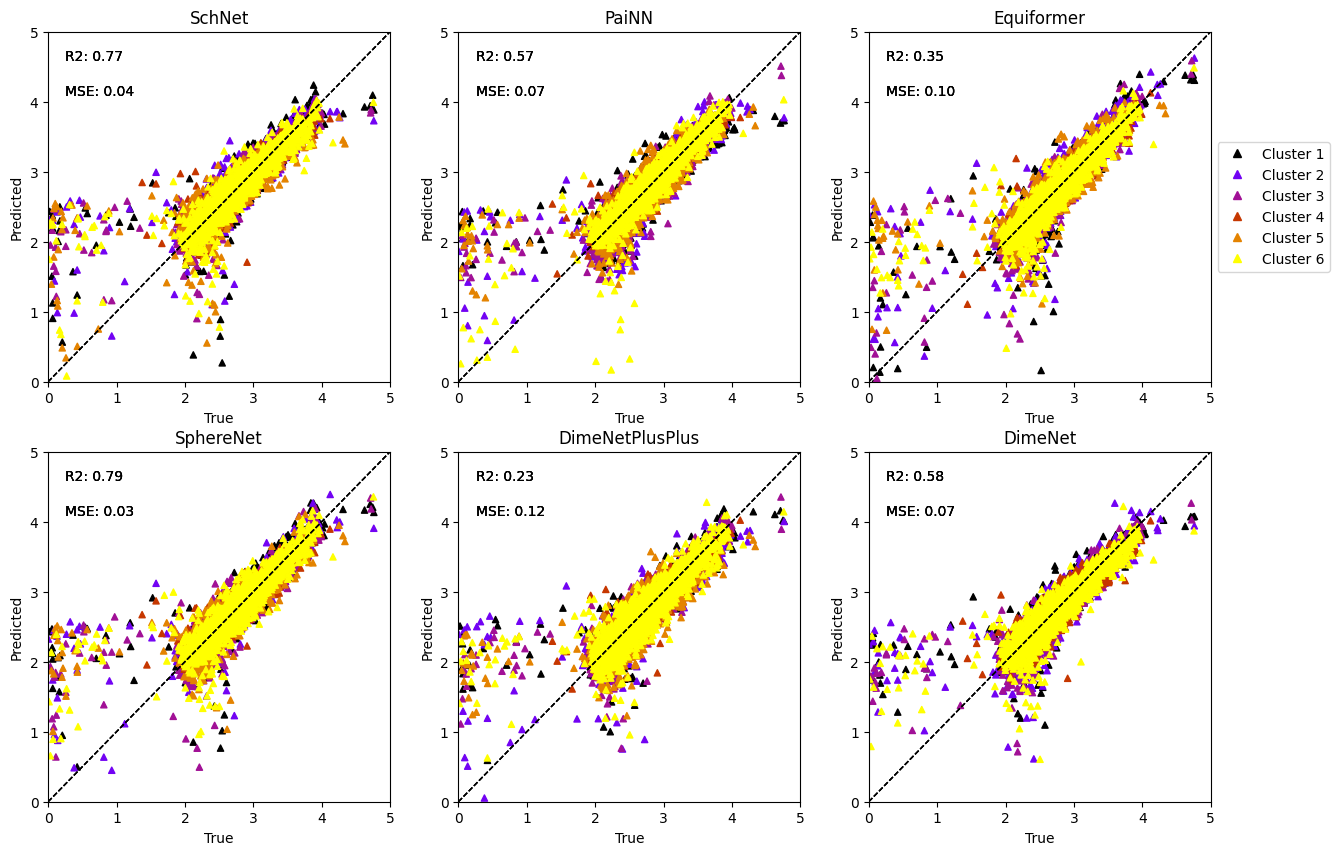

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib.cm import viridis, inferno, plasma, cool, hot, PiYG, gnuplot, gist_earth, BrBG, PuOr
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

# Assuming you have a list of model names
model_names = ['SchNet', 'PaiNN', 'Equiformer', 'SphereNet', 'DimeNetPlusPlus', 'DimeNet']  # Update with your actual model names

# Assuming you have a list of cluster numbers
cluster_numbers = [1, 2, 3, 4, 5, 6]  # Update with your actual cluster numbers

target = 'ES1'
axis_min = 0
axis_max = 5

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Define colormaps for train, val, and test sets
train_cmap = gnuplot
val_cmap = gnuplot
test_cmap = BrBG

# List to store legend handles and labels
legend_handles = []
legend_labels = []

# Normalize cluster numbers to use as indices for colormap
norm = Normalize(vmin=min(cluster_numbers), vmax=max(cluster_numbers))

# Iterate over each model
for model_idx, model_name in enumerate(model_names):
    # Create empty lists to store true and predicted values for all clusters
    all_y_true = []
    all_y_pred = []
    all_splits = []
    all_clusters = []

    # Iterate over each cluster
    for cluster_number in cluster_numbers:
        if model_name == 'DimeNet' and cluster_number == 5:
            continue
        else:
            # Load data for the current cluster
            file_path = f'/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/{cluster_number}_cluster_{target}_model_inferences_totalset.csv'
            df = pd.read_csv(file_path, index_col=0)

            # Extract true and predicted values for the current cluster and model
            y_true = df[f'{model_name}_true_{target}']
            y_pred = df[f'{model_name}_pred_{target}']
            # only analyze the train and val splits
            split = df['set']

            # Append to the lists
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)
            all_splits.extend(split)
            all_clusters.extend([cluster_number] * len(y_true))

            # Create legend entry for each cluster (regardless of split)
            legend_label = f"Cluster {cluster_number}"
            if legend_label not in legend_labels:
                color = val_cmap(norm(cluster_number))
                marker = '^'
                legend_handles.append(Line2D([], [], marker=marker, color=color, label=legend_label, linestyle='None'))
                legend_labels.append(legend_label)
    
    # Calculate R2 for the current model
    r2 = r2_score(all_y_true, all_y_pred)
    print(f'{model_name} R2: {r2}')

    # Plot the true vs predicted values for all the clusters for the current model
    for split in np.unique(all_splits):
        split_indices = [i for i, s in enumerate(all_splits) if s == split]
        # if split == 'train':
        #     colors = train_cmap(norm(all_clusters))
        #     marker = 'x'
        #     plot = axs[model_idx // 3, model_idx % 3].scatter([all_y_true[i] for i in split_indices], [all_y_pred[i] for i in split_indices], c=colors[split_indices], label=f'{split} (Cluster {cluster_number})', marker=marker, s=20)
        if split == 'val':
            colors = val_cmap(norm(all_clusters))
            marker = '^'
            plot = axs[model_idx // 3, model_idx % 3].scatter([all_y_true[i] for i in split_indices], [all_y_pred[i] for i in split_indices], c=colors[split_indices], label=f'{split} (Cluster {cluster_number})', marker=marker, s=20)
        axs[model_idx // 3, model_idx % 3].set_title(model_name)
        axs[model_idx // 3, model_idx % 3].set_xlabel('True')
        axs[model_idx // 3, model_idx % 3].set_ylabel('Predicted')

        # Add R2
        axs[model_idx // 3, model_idx % 3].text(0.05, 0.95, f'R2: {r2:.2f}', transform=axs[model_idx // 3][model_idx % 3].transAxes, fontsize=10, verticalalignment='top')

        # add mse
        mse = np.mean((np.array(all_y_true) - np.array(all_y_pred))**2)
        axs[model_idx // 3, model_idx % 3].text(0.05, 0.85, f'MSE: {mse:.2f}', transform=axs[model_idx // 3][model_idx % 3].transAxes, fontsize=10, verticalalignment='top')

        # add a straight line
        axs[model_idx // 3, model_idx % 3].plot([axis_min, axis_max], [axis_min, axis_max], color='black', lw=1, ls='--')

        # set axis limits
        axs[model_idx // 3, model_idx % 3].set_xlim(axis_min, axis_max)
        axs[model_idx // 3, model_idx % 3].set_ylim(axis_min, axis_max)

# Add legend to the last subplot
axs[0, 2].legend(handles=legend_handles, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


SchNet R2: 0.7703851922083893
PaiNN R2: 0.5658794017924164
Equiformer R2: 0.35226206168562335
SphereNet R2: 0.7876516358763944
DimeNetPlusPlus R2: 0.22934032860949538
DimeNet R2: 0.5805112939214865


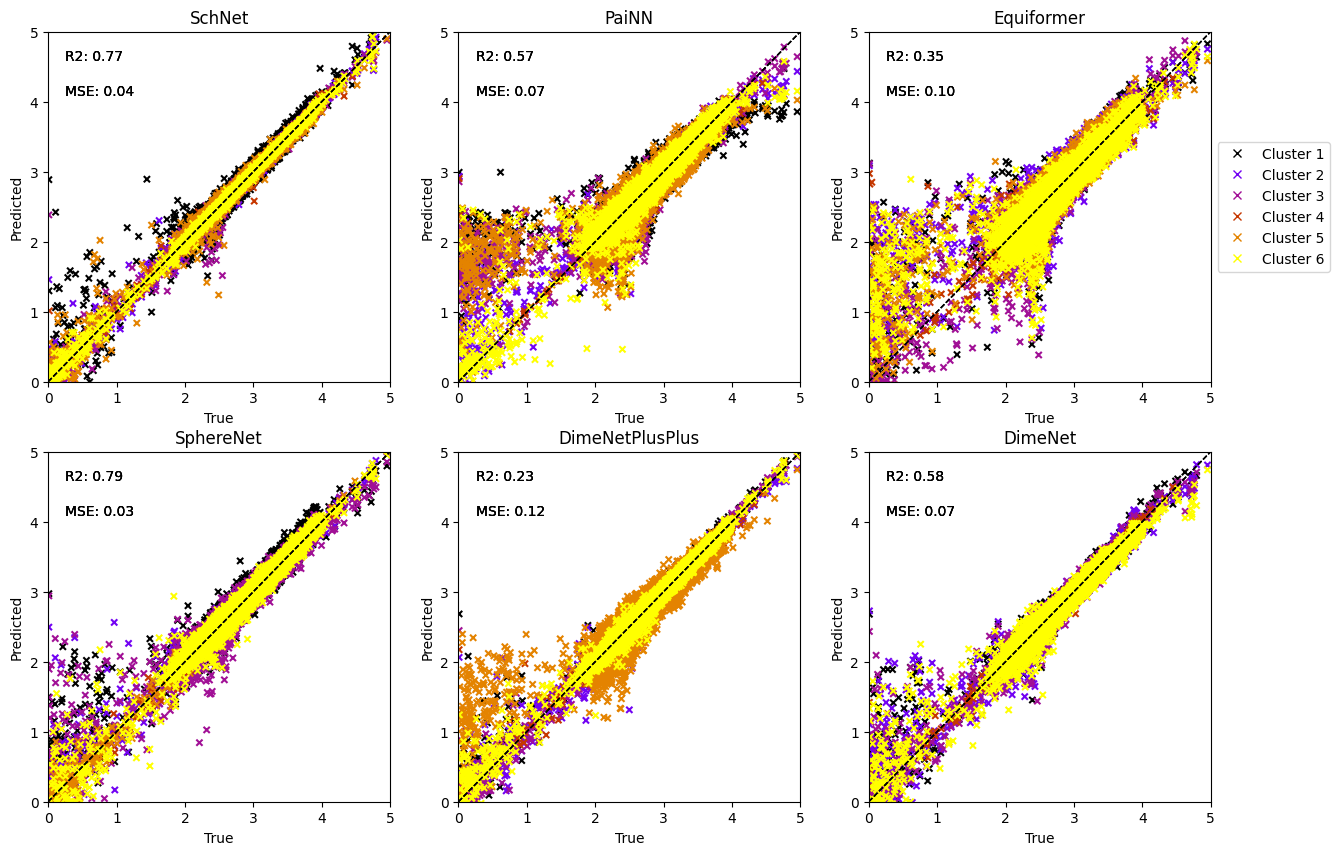

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib.cm import viridis, inferno, plasma, cool, hot, PiYG, gnuplot, gist_earth, BrBG, PuOr
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

# Assuming you have a list of model names
model_names = ['SchNet', 'PaiNN', 'Equiformer', 'SphereNet', 'DimeNetPlusPlus', 'DimeNet']  # Update with your actual model names

# Assuming you have a list of cluster numbers
cluster_numbers = [1, 2, 3, 4, 5, 6]  # Update with your actual cluster numbers

target = 'ES1'
axis_min = 0
axis_max = 5

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Define colormaps for train, val, and test sets
train_cmap = gnuplot
val_cmap = gnuplot
test_cmap = BrBG

# List to store legend handles and labels
legend_handles = []
legend_labels = []

# Normalize cluster numbers to use as indices for colormap
norm = Normalize(vmin=min(cluster_numbers), vmax=max(cluster_numbers))

# Iterate over each model
for model_idx, model_name in enumerate(model_names):
    # Create empty lists to store true and predicted values for all clusters
    all_y_true = []
    all_y_pred = []
    all_splits = []
    all_clusters = []

    # Iterate over each cluster
    for cluster_number in cluster_numbers:
        if model_name == 'DimeNet' and cluster_number == 5:
            continue
        else:
            # Load data for the current cluster
            file_path = f'/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/{cluster_number}_cluster_{target}_model_inferences_totalset.csv'
            df = pd.read_csv(file_path, index_col=0)

            # Extract true and predicted values for the current cluster and model
            y_true = df[f'{model_name}_true_{target}']
            y_pred = df[f'{model_name}_pred_{target}']
            # only analyze the train and val splits
            split = df['set']

            # Append to the lists
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)
            all_splits.extend(split)
            all_clusters.extend([cluster_number] * len(y_true))

            # Create legend entry for each cluster (regardless of split)
            legend_label = f"Cluster {cluster_number}"
            if legend_label not in legend_labels:
                color = train_cmap(norm(cluster_number))
                marker = 'x'
                legend_handles.append(Line2D([], [], marker=marker, color=color, label=legend_label, linestyle='None'))
                legend_labels.append(legend_label)
    
    # Calculate R2 for the current model
    r2 = r2_score(all_y_true, all_y_pred)
    print(f'{model_name} R2: {r2}')

    # Plot the true vs predicted values for all the clusters for the current model
    for split in np.unique(all_splits):
        split_indices = [i for i, s in enumerate(all_splits) if s == split]
        # if split == 'train':
        #     colors = train_cmap(norm(all_clusters))
        #     marker = 'x'
        #     plot = axs[model_idx // 3, model_idx % 3].scatter([all_y_true[i] for i in split_indices], [all_y_pred[i] for i in split_indices], c=colors[split_indices], label=f'{split} (Cluster {cluster_number})', marker=marker, s=20)
        if split == 'train':
            colors = val_cmap(norm(all_clusters))
            marker = 'x'
            plot = axs[model_idx // 3, model_idx % 3].scatter([all_y_true[i] for i in split_indices], [all_y_pred[i] for i in split_indices], c=colors[split_indices], label=f'{split} (Cluster {cluster_number})', marker=marker, s=20)
        axs[model_idx // 3, model_idx % 3].set_title(model_name)
        axs[model_idx // 3, model_idx % 3].set_xlabel('True')
        axs[model_idx // 3, model_idx % 3].set_ylabel('Predicted')

        # Add R2
        axs[model_idx // 3, model_idx % 3].text(0.05, 0.95, f'R2: {r2:.2f}', transform=axs[model_idx // 3][model_idx % 3].transAxes, fontsize=10, verticalalignment='top')

        # add mse
        mse = np.mean((np.array(all_y_true) - np.array(all_y_pred))**2)
        axs[model_idx // 3, model_idx % 3].text(0.05, 0.85, f'MSE: {mse:.2f}', transform=axs[model_idx // 3][model_idx % 3].transAxes, fontsize=10, verticalalignment='top')

        # add a straight line
        axs[model_idx // 3, model_idx % 3].plot([axis_min, axis_max], [axis_min, axis_max], color='black', lw=1, ls='--')

        # set axis limits
        axs[model_idx // 3, model_idx % 3].set_xlim(axis_min, axis_max)
        axs[model_idx // 3, model_idx % 3].set_ylim(axis_min, axis_max)

# Add legend to the last subplot
axs[0, 2].legend(handles=legend_handles, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
